In [1]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
survey_data = '/home/zsherman/Documents/SurveySummary_08192016.xlsx'

# Question Index


Rank Possible New Features: Q13, Q20, Q41, Q51

Rank Current Favorite Features of Py-ART: Q40, Q50

Organization User Belongs to: Q11, Q18, Q36, Q46

User Organization Role: Q10, Q17, Q35, Q45

Barriers in Using Py-ART: Q16, Q23

Barriers in Contributing to Py-ART: Q44, Q54

Operating System Used: Q38, Q48

Installation Method: Q39, Q49

How Long the User has been Using Py-ART: Q37, Q47


In [2]:
xl = pd.ExcelFile('/home/zsherman/Documents/SurveySummary_08192016.xlsx')
xl.sheet_names

['Survey Tree Map',
 'Question 1',
 'Question 2',
 'Question 10',
 'Question 11',
 'Question 12',
 'Question 13',
 'Question 15',
 'Question 16',
 'Question 17',
 'Question 18',
 'Question 19',
 'Question 20',
 'Question 21',
 'Question 22',
 'Question 23',
 'Question 24',
 'Question 35',
 'Question 36',
 'Question 37',
 'Question 38',
 'Question 39',
 'Question 40',
 'Question 41',
 'Question 42',
 'Question 43',
 'Question 44',
 'Question 45',
 'Question 46',
 'Question 47',
 'Question 48',
 'Question 49',
 'Question 50',
 'Question 51',
 'Question 52',
 'Question 53',
 'Question 54',
 'Question 55']

In [3]:
survey_sheet_names = [xl.sheet_name for xl.sheet_name in xl.sheet_names]

In [4]:
survey_sheet_names[6]

'Question 13'

In [5]:
def panda_question_read(sheet_number, skip_footer_number):
    qsheet_number = pd.read_excel(survey_data, sheetname=('Question %s' % sheet_number), 
                      skiprows=2, skip_footer=skip_footer_number,
                      index_col='Answer Options')
    
    if ('Response Count' in qsheet_number.columns):
         qsheet_number.rename(columns={'Response Count': 'Q%s Response Count' % sheet_number}, 
                         inplace=True)
    if ('Rating Average' in qsheet_number.columns):
         qsheet_number.rename(columns={'Rating Average': 'Q%s Rating Average' % sheet_number}, 
                         inplace=True)
    if ('Response Percent' in qsheet_number.columns):
         qsheet_number.rename(columns={'Response Percent': 'Q%s Response Percent' % sheet_number}, 
                         inplace=True)
        
    del qsheet_number['Answer Options.1']
    
    #qsheet_number_no_zeros = qsheet_number[qsheet_number !=0]
    #qsheet_number_columns = np.asanyarray(qsheet_number.columns[:12])
    #qsheet_number_int = qsheet_number_columns.astype(np.float64)
    #qsheet_number_values = qsheet_number_no_zeros.iloc[0:13,0:12]+1 * qsheet_number_int

    #qsheet_number_values = qsheet_number_no_zeros[qsheet_number_no_zeros >0 * np.float(qsheet_number_no_zeros.iloc[:])]
  
    #qsheet_number['mean'] = qsheet_number_values.mean(axis=1)
    #qsheet_number['var'] = qsheet_number_values.var(axis=1)
    qsheet_number['std'] = qsheet_number.std(axis=1)
    
    
    return qsheet_number

In [6]:
#Used for pie plots throughout notebook.
def make_autopct(q):
    def my_autopct(pct):
        total = sum(q)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8',
          '#00AAAA','#00C69C','#00E28E','#00FF80']
explode = (0, 0.025, 0.05,0.1,0.1,0.2,0.3,0.4) 

#Calculates mean, var, and std across ratings 1-13
def mean_var_std_calc(sheet_number, end_column):
    qsheet_number_no_zeros = qsheet_number[qsheet_number !=0]
    qsheet_number_include = qsheet_number_no_zeros.iloc[:,:end_column]
    qsheet_number['mean'] = qsheet_number_include.mean(axis=1)
    qsheet_number['var'] = qsheet_number_include.var(axis=1)
    qsheet_number['std'] = qsheet_number_include.std(axis=1)
    return qsheet_number

In [7]:
q51 = panda_question_read(51, 2)
q51_columns = np.asanyarray(q51.columns[:13])
q51_int = q51_columns.astype(np.float64)
q51

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q51 Rating Average,Q51 Response Count,std
Answer Options,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,1,1,1,1,0,1,3,0,2,0,2,0,2,0,7.36,14,3.633401
Cell/Object Tracking,0,4,3,4,2,0,0,0,0,0,0,1,0,0,3.93,14,3.593741
Multi-Doppler Winds,9,1,0,0,2,0,0,0,0,1,1,0,0,1,3.00,15,4.122600
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",1,0,5,2,1,1,1,2,0,1,0,1,0,0,5.33,15,3.780616
"Easier ""One step"" rainfall retrievals",0,1,1,0,1,1,0,1,3,2,2,1,2,0,8.73,15,3.953581
More input formats,1,1,1,2,2,1,2,0,1,1,1,1,0,0,6.14,14,3.472304
More output formats,2,2,1,0,1,2,0,2,2,0,1,0,1,0,6.00,14,3.500000
"More data quality code (eg clutter rejection, biological masks..)",0,2,2,1,0,2,1,1,4,2,0,0,0,0,6.47,15,3.818657
Velocity Azimuth Display wind retrievals,0,1,1,2,0,3,1,3,1,1,0,1,0,0,6.64,14,3.587887


In [8]:
#attempting to retrieve standand deviation and variance.

q51['Rating Total'] = (np.sum(q51.iloc[0:13,0:13].mul(q51_int, axis=1), axis=1))
q51['mean'] = (np.sum(q51.iloc[0:13,0:13].mul(q51_int, axis=1), axis=1))/ np.sum(q51.iloc[0:13, 0:13], axis=1)
q51['var'] = (q51.iloc[0:13,0:13].mul(q51_int, axis=1)).var()
q51

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q51 Rating Average,Q51 Response Count,std,Rating Total,mean,var
Answer Options,,,,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,1,1,1,1,0,1,3,0,2,0,2,0,2,0,7.36,14,3.633401,103.0,7.357143,NaN
Cell/Object Tracking,0,4,3,4,2,0,0,0,0,0,0,1,0,0,3.93,14,3.593741,55.0,3.928571,NaN
Multi-Doppler Winds,9,1,0,0,2,0,0,0,0,1,1,0,0,1,3.00,15,4.122600,42.0,3.000000,NaN
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",1,0,5,2,1,1,1,2,0,1,0,1,0,0,5.33,15,3.780616,80.0,5.333333,NaN
"Easier ""One step"" rainfall retrievals",0,1,1,0,1,1,0,1,3,2,2,1,2,0,8.73,15,3.953581,131.0,8.733333,NaN
More input formats,1,1,1,2,2,1,2,0,1,1,1,1,0,0,6.14,14,3.472304,86.0,6.142857,NaN
More output formats,2,2,1,0,1,2,0,2,2,0,1,0,1,0,6.00,14,3.500000,84.0,6.000000,NaN
"More data quality code (eg clutter rejection, biological masks..)",0,2,2,1,0,2,1,1,4,2,0,0,0,0,6.47,15,3.818657,97.0,6.466667,NaN
Velocity Azimuth Display wind retrievals,0,1,1,2,0,3,1,3,1,1,0,1,0,0,6.64,14,3.587887,93.0,6.642857,NaN


In [9]:
q1 = panda_question_read(1, 2)
q1

,Q1 Response Percent,Q1 Response Count,std
Answer Options,,,
Yes,0.686,24,16.485487
No,0.314,11,7.556143


# Have you ever used Py-ART before?

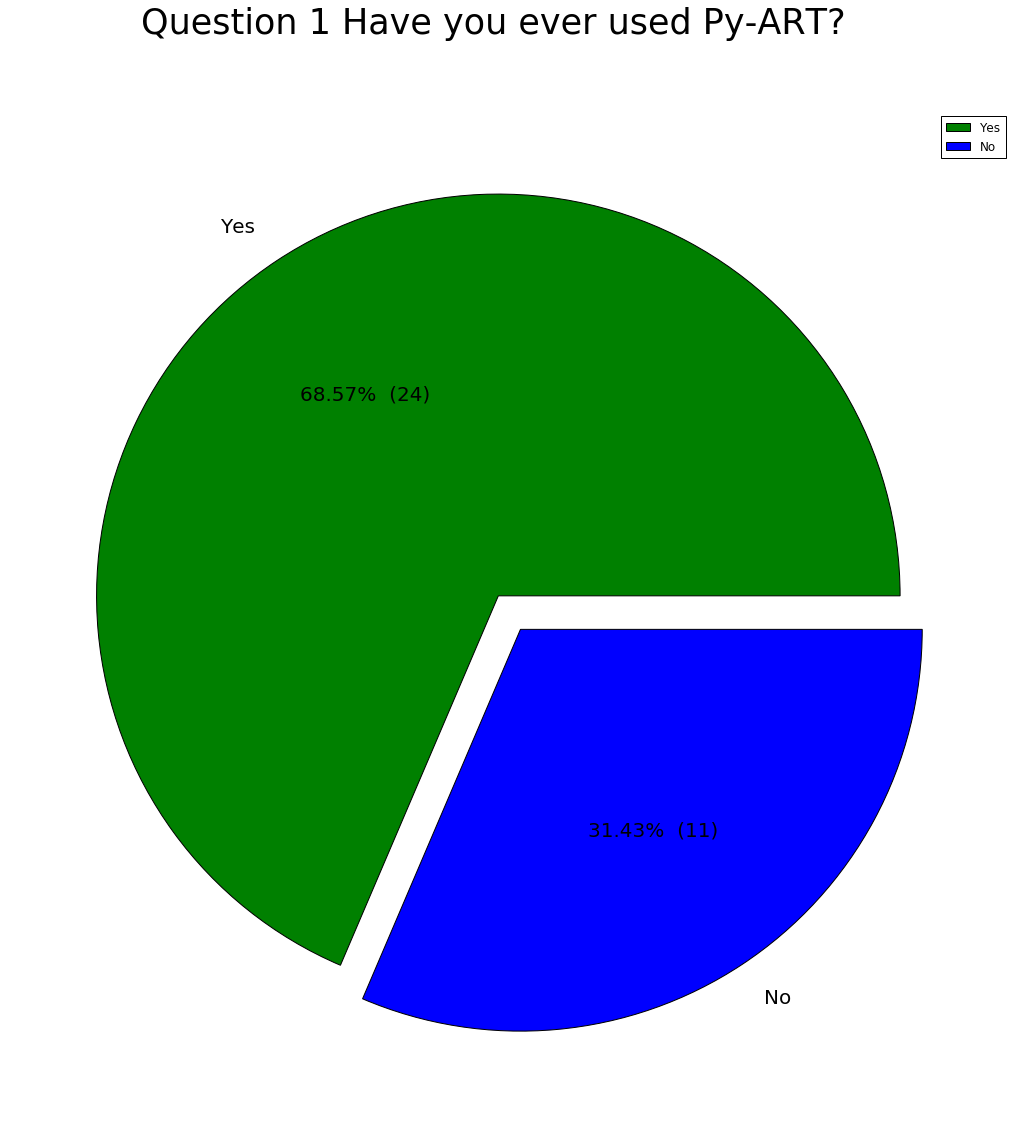

In [10]:
exploding = (0.05, 0.05)
q1['Q1 Response Count'].plot.pie(figsize=(18, 18), 
                                   autopct=make_autopct(q1['Q1 Response Count']),
                                   colors=['g', 'b'], 
                                   fontsize=20, explode=exploding)
plt.legend(labels=q1.index, loc="best")
plt.suptitle('Question 1 Have you ever used Py-ART?', fontsize=35)
plt.ylabel('')
plt.show()

## Possible New Features

In [11]:
q13 = panda_question_read(13, 2)
#q13.drop('Unnamed: 18', axis=1, inplace=True)
#q13_no_zeros= q13[q13 !=0]
#q13_include = q13_no_zeros.iloc[:,:12]
#q13['mean'] = q13_include.mean(axis=1)
q13['std']=q13['Q13 Rating Average'].std()
q13

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q13 Rating Average,Q13 Response Count,Unnamed: 18,std
Answer Options,,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.948272
Cell/Object Tracking,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,NaN,2.948272
Multi-Doppler Winds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.948272
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.948272
"Easier ""One step"" rainfall retrievals",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.948272
More input formats,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,1,NaN,2.948272
More output formats,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,1,NaN,2.948272
"More data quality code (eg clutter rejection, biological masks..)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,NaN,2.948272
Velocity Azimuth Display wind retrievals,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,NaN,2.948272


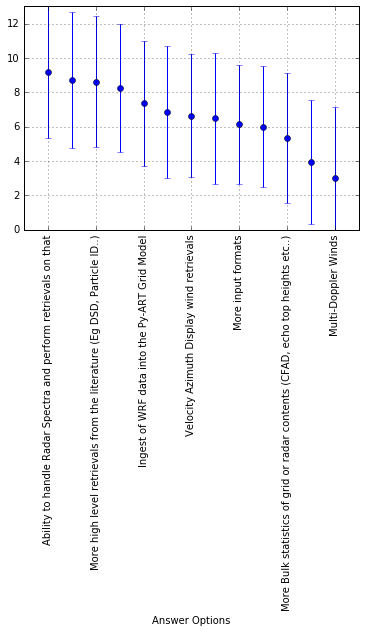

In [12]:
fig, ax = plt.subplots()
q51['Q51 Rating Average'].sort_values(ascending=False).plot(fmt='o', rot=90, grid='on', yerr=q51['std'], xlim=(-1, 13), ylim=(0, 13))
plt.show()

In [13]:
q20 = panda_question_read(20, 2)
q20

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q20 Rating Average,Q20 Response Count,std
Answer Options,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.00,2,2.257395
Cell/Object Tracking,0,1,0,0,0,0,0,1,0,0,0,0,0,0,5.00,2,1.314978
Multi-Doppler Winds,1,0,0,0,1,0,0,0,0,0,0,0,0,0,3.00,2,0.892095
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",0,0,1,1,0,0,0,0,0,0,1,0,0,0,6.00,3,1.612452
"Easier ""One step"" rainfall retrievals",1,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,2,1.203727
More input formats,0,0,0,0,1,0,0,0,0,0,1,0,0,0,8.00,2,2.016598
More output formats,1,0,0,0,0,1,0,0,0,0,0,1,0,0,6.33,3,1.684579
"More data quality code (eg clutter rejection, biological masks..)",0,0,0,0,0,0,0,0,0,1,0,1,0,0,11.00,2,2.743933
Velocity Azimuth Display wind retrievals,0,1,0,1,0,1,0,0,0,0,0,0,0,0,4.00,3,1.204159


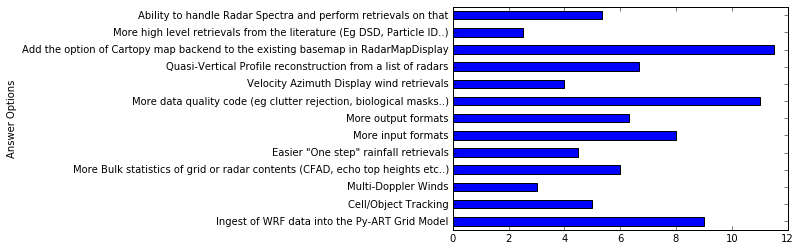

In [14]:
q20['Q20 Rating Average'].plot.barh(stacked=True)

In [15]:
q41 = panda_question_read(41, 2)
q41

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q41 Rating Average,Q41 Response Count,std
Answer Options,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,0,2,0,0,0,0,0,0,0,0,0,0,1,0,5.67,3,1.584026
Cell/Object Tracking,2,0,0,0,0,0,0,1,0,0,0,0,0,0,3.33,3,1.144504
Multi-Doppler Winds,0,0,2,0,0,0,0,0,1,0,0,0,0,0,5.00,3,1.447699
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",0,1,0,1,0,0,1,0,0,0,0,0,0,0,4.33,3,1.267007
"Easier ""One step"" rainfall retrievals",0,0,0,0,2,0,0,0,0,1,0,0,0,0,6.67,3,1.797328
More input formats,0,0,0,1,0,0,1,0,0,0,0,1,0,0,7.67,3,1.985776
More output formats,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,2,1.203727
"More data quality code (eg clutter rejection, biological masks..)",0,0,0,0,0,1,0,0,0,1,0,1,0,0,9.33,3,2.371509
Velocity Azimuth Display wind retrievals,0,0,1,0,0,0,0,0,2,0,0,0,0,0,7.00,3,1.869715


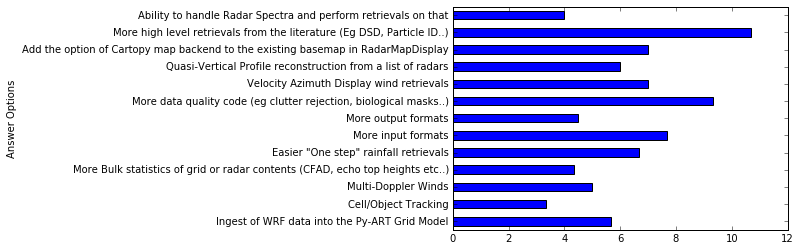

In [16]:
q41['Q41 Rating Average'].plot.barh(stacked=True)
plt.show()

In [17]:
q51 = panda_question_read(51, 2)
q51

,1,2,3,4,5,6,7,8,9,10,11,12,13,No idea what this is,Q51 Rating Average,Q51 Response Count,std
Answer Options,,,,,,,,,,,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,1,1,1,1,0,1,3,0,2,0,2,0,2,0,7.36,14,3.633401
Cell/Object Tracking,0,4,3,4,2,0,0,0,0,0,0,1,0,0,3.93,14,3.593741
Multi-Doppler Winds,9,1,0,0,2,0,0,0,0,1,1,0,0,1,3.00,15,4.122600
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",1,0,5,2,1,1,1,2,0,1,0,1,0,0,5.33,15,3.780616
"Easier ""One step"" rainfall retrievals",0,1,1,0,1,1,0,1,3,2,2,1,2,0,8.73,15,3.953581
More input formats,1,1,1,2,2,1,2,0,1,1,1,1,0,0,6.14,14,3.472304
More output formats,2,2,1,0,1,2,0,2,2,0,1,0,1,0,6.00,14,3.500000
"More data quality code (eg clutter rejection, biological masks..)",0,2,2,1,0,2,1,1,4,2,0,0,0,0,6.47,15,3.818657
Velocity Azimuth Display wind retrievals,0,1,1,2,0,3,1,3,1,1,0,1,0,0,6.64,14,3.587887


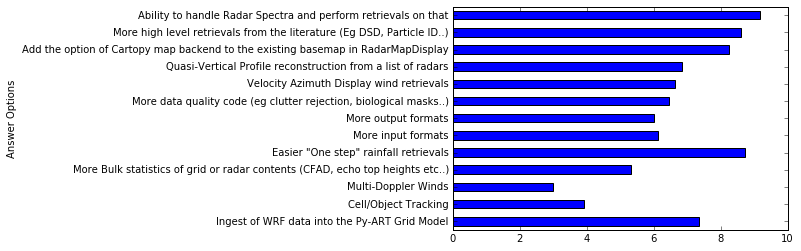

In [18]:
q51['Q51 Rating Average'].plot.barh(stacked=True)

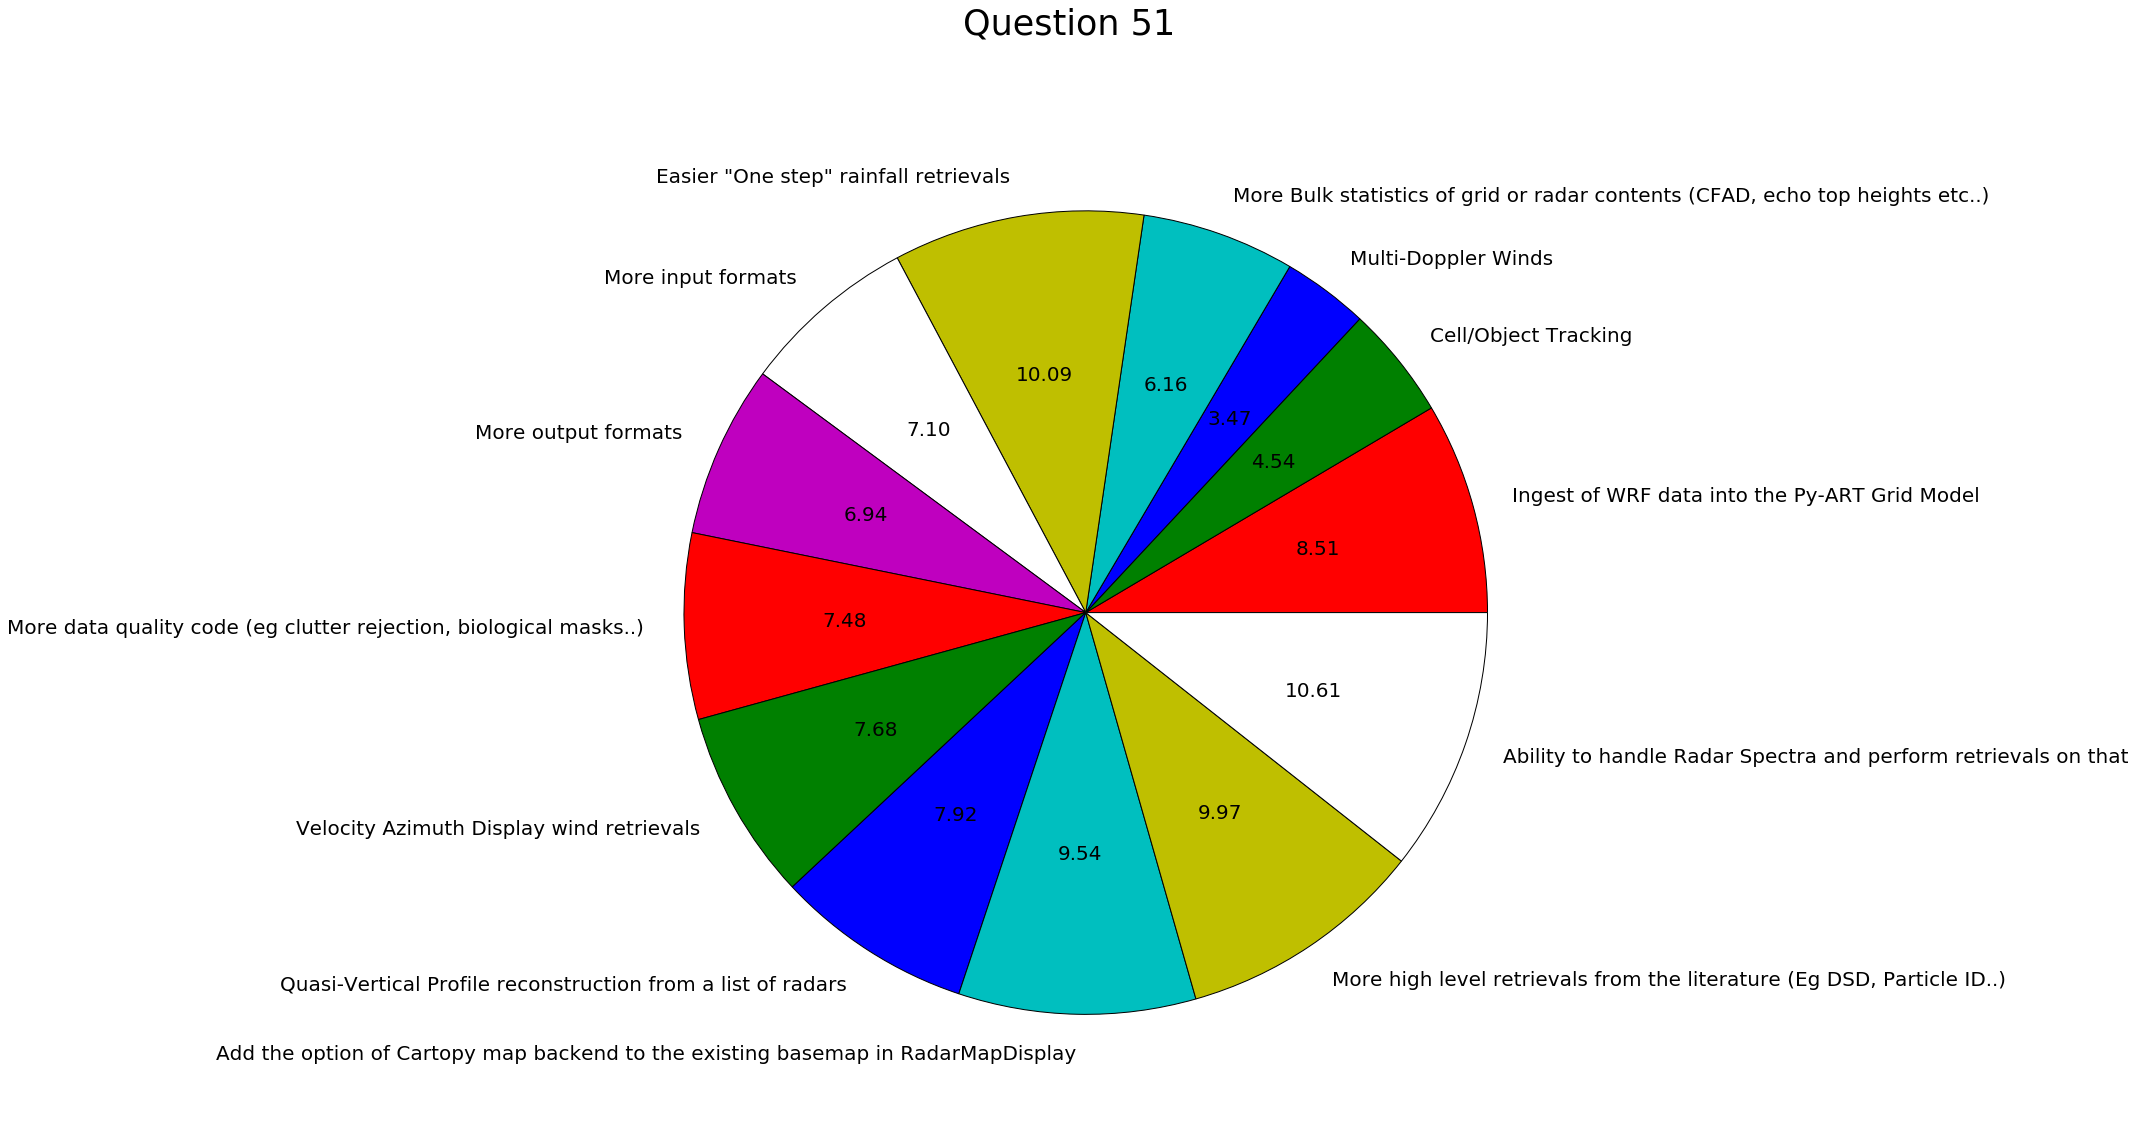

In [19]:
q51['Q51 Rating Average'].plot.pie(figsize=(18, 18), autopct='%.2f',
                               colors=['r', 'g', 'b', 'c', 'y', 'w', 'm'], 
                               fontsize=20)
plt.suptitle('Question 51', fontsize=35)
plt.ylabel('')
plt.show()

In [20]:
#df = pd.concat([df1, df2])
#foo = df.groupby(level=0).mean()
#foo.head()

new_df_concat = pd.concat((q13['Q13 Rating Average'], q20['Q20 Rating Average'], 
                           q41['Q41 Rating Average'], q51['Q51 Rating Average']))
new_df_concat = pd.DataFrame(new_df_concat)
new_by_row_index = new_df_concat.groupby(new_df_concat.index)

new_df_std = new_by_row_index.std()
new_df_var = new_by_row_index.var()
new_df_mean = new_by_row_index.mean()

#q13['std'] = q20['std'] = q41['std'] = q51['std'] = (new_df_std)
#q13['var'] = q20['var'] = q41['var'] = q51['var'] = (new_df_var)

In [21]:
new_df_concat_axis = pd.concat((q13['Q13 Rating Average'], q20['Q20 Rating Average'], 
                                q41['Q41 Rating Average'], q51['Q51 Rating Average']), 
                                axis=1)
new_df_concat_axis = pd.DataFrame(new_df_concat_axis)

new_df_concat_axis['std'] = (new_df_std)
new_df_concat_axis['var'] = (new_df_var)
new_df_concat_axis['mean'] = (new_df_mean)

new_df_concat_axis

,Q13 Rating Average,Q20 Rating Average,Q41 Rating Average,Q51 Rating Average,std,var,mean
Answer Options,,,,,,,
Ingest of WRF data into the Py-ART Grid Model,0,9.00,5.67,7.36,3.915281,15.329425,5.5075
Cell/Object Tracking,1,5.00,3.33,3.93,1.690848,2.858967,3.3150
Multi-Doppler Winds,0,3.00,5.00,3.00,2.061553,4.250000,2.7500
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",0,6.00,4.33,5.33,2.698697,7.282967,3.9150
"Easier ""One step"" rainfall retrievals",0,4.50,6.67,8.73,3.739398,13.983100,4.9750
More input formats,7,8.00,7.67,6.14,0.821477,0.674825,7.2025
More output formats,6,6.33,4.50,6.00,0.819893,0.672225,5.7075
"More data quality code (eg clutter rejection, biological masks..)",2,11.00,9.33,6.47,3.939112,15.516600,7.2000
Velocity Azimuth Display wind retrievals,3,4.00,7.00,6.64,1.965299,3.862400,5.1600


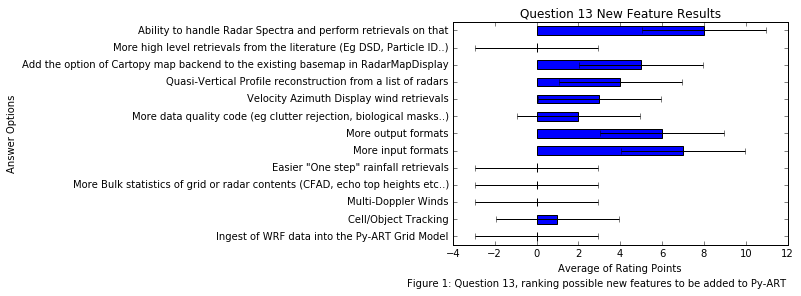

In [22]:
q13['Q13 Rating Average'].plot.barh(xerr=q13['std'],stacked=True,
                               title='Question 13 New Feature Results')
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 1: Question 13, ranking possible new features to be added to Py-ART",
            fontsize=10)
plt.show()

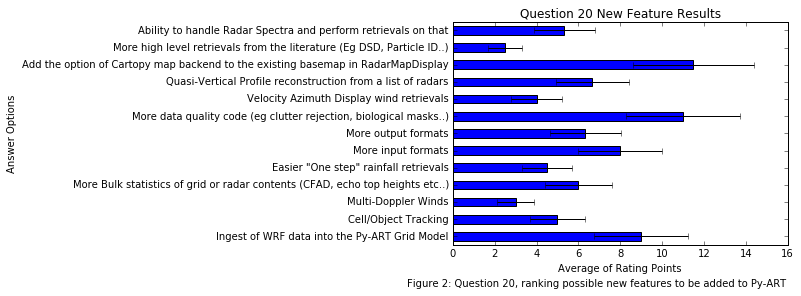

In [23]:
q20['Q20 Rating Average'].plot.barh(xerr=q20['std'],stacked=True, 
                                title='Question 20 New Feature Results')
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 2: Question 20, ranking possible new features to be added to Py-ART",
            fontsize=10)
plt.show()

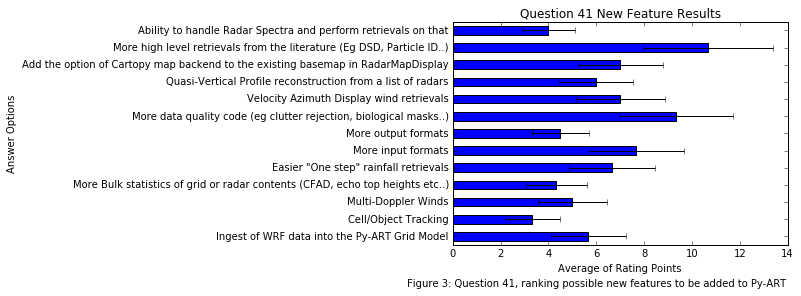

In [24]:
q41['Q41 Rating Average'].plot.barh(xerr=q41['std'],stacked=True,
                               title='Question 41 New Feature Results')
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 3: Question 41, ranking possible new features to be added to Py-ART",
            fontsize=10)
plt.show()

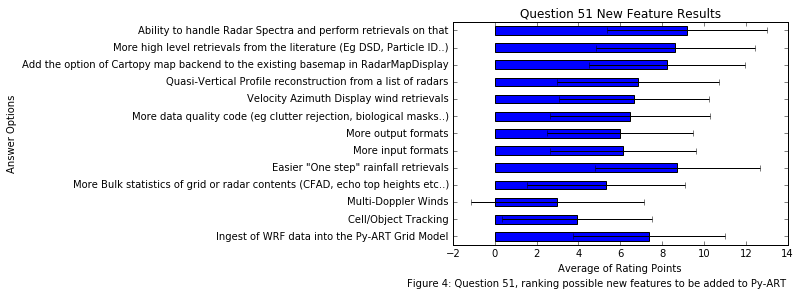

In [25]:
q51['Q51 Rating Average'].plot.barh(xerr=q51['std'],stacked=True,
                               title='Question 51 New Feature Results')
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 4: Question 51, ranking possible new features to be added to Py-ART",
            fontsize=10)
plt.show()

## Favorite Feature Results

In [26]:
q40 = panda_question_read(40, 2)
q40

,1,2,3,4,5,6,7,8,9,N/A,Q40 Rating Average,Q40 Response Count,std
Answer Options,,,,,,,,,,,,,
Plotting/visualization,2,0,0,0,0,1,0,0,0,0,2.67,3,1.162475
So many formats,0,2,0,0,0,0,0,1,0,0,4.00,3,1.403459
Gridding including gridding multiple radars,0,0,0,0,1,1,0,1,0,0,6.33,3,1.892565
Polarimetric phase processing processing (LP),0,0,1,1,0,0,0,0,0,0,3.50,2,1.110385
Polarimetric phase processing processing (other),0,1,0,0,1,0,1,0,0,0,4.67,3,1.486958
Dealiasing,0,0,0,2,0,1,0,0,0,0,4.67,3,1.546888
As a dependency for CSU_Tools or ARTView or other,0,0,1,0,0,0,0,1,0,1,5.50,3,1.684938
Knowing VAPS developed easily integrate with ADI/ARM systems,0,0,0,0,0,0,0,0,1,2,9.00,3,2.632835
Attenuation Correction,0,0,1,0,0,0,2,0,0,0,5.67,3,1.778657


In [27]:
q50 = panda_question_read(50, 2)
q50

,1,2,3,4,5,6,7,8,9,N/A,Q50 Rating Average,Q50 Response Count,std
Answer Options,,,,,,,,,,,,,
Plotting/visualization,6,3,4,0,0,0,0,0,0,0,1.85,13,3.917180
So many formats,4,2,4,2,0,0,0,0,1,0,2.85,13,3.677478
Gridding including gridding multiple radars,1,3,1,1,3,0,0,2,0,3,4.09,14,3.824729
Polarimetric phase processing processing (LP),0,0,0,2,2,2,2,2,0,4,6.00,14,3.950451
Polarimetric phase processing processing (other),0,0,0,0,2,2,4,1,0,4,6.44,13,3.858609
Dealiasing,1,4,1,2,1,2,0,1,0,1,3.75,13,3.545898
As a dependency for CSU_Tools or ARTView or other,1,1,1,1,3,2,1,1,0,2,4.73,13,3.512038
Knowing VAPS developed easily integrate with ADI/ARM systems,0,0,0,0,1,0,0,1,4,6,8.17,12,4.028382
Attenuation Correction,0,0,1,3,0,2,3,1,1,3,5.91,14,3.920854


In [28]:
feat_concat = pd.concat((q40['Q40 Rating Average'], q50['Q50 Rating Average']))
feat_concat = pd.DataFrame(feat_concat)
feat_by_row_index = feat_concat.groupby(feat_concat.index)

feat_df_std = feat_by_row_index.std()
feat_df_var = feat_by_row_index.var()
feat_df_mean = feat_by_row_index.mean()

#q40['std'] = q50['std'] = (feat_df_std)
#q40['var'] = q50['var'] = (feat_df_var)

In [29]:
feat_concat_axis = pd.concat((q40['Q40 Rating Average'], q50['Q50 Rating Average']), axis=1)
feat_concat_axis = pd.DataFrame(feat_concat_axis)

feat_concat_axis['std'] = (feat_df_std)
feat_concat_axis['var'] = (feat_df_var)
feat_concat_axis['mean'] = (feat_df_mean)

feat_concat_axis

,Q40 Rating Average,Q50 Rating Average,std,var,mean
Answer Options,,,,,
Plotting/visualization,2.67,1.85,0.579828,0.33620,2.260
So many formats,4.00,2.85,0.813173,0.66125,3.425
Gridding including gridding multiple radars,6.33,4.09,1.583919,2.50880,5.210
Polarimetric phase processing processing (LP),3.50,6.00,1.767767,3.12500,4.750
Polarimetric phase processing processing (other),4.67,6.44,1.251579,1.56645,5.555
Dealiasing,4.67,3.75,0.650538,0.42320,4.210
As a dependency for CSU_Tools or ARTView or other,5.50,4.73,0.544472,0.29645,5.115
Knowing VAPS developed easily integrate with ADI/ARM systems,9.00,8.17,0.586899,0.34445,8.585
Attenuation Correction,5.67,5.91,0.169706,0.02880,5.790


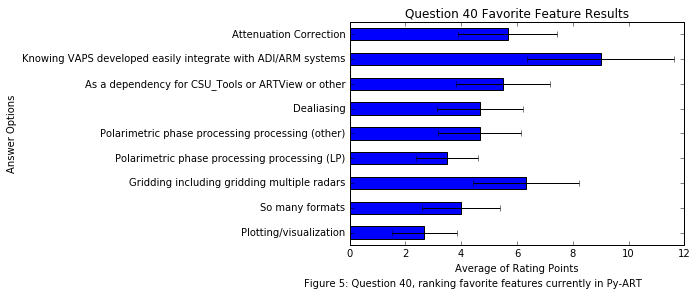

In [30]:
q40['Q40 Rating Average'].plot.barh(xerr=q40['std'],stacked=True,
                               title='Question 40 Favorite Feature Results')
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 5: Question 40, ranking favorite features currently in Py-ART",
            fontsize=10)
plt.show()

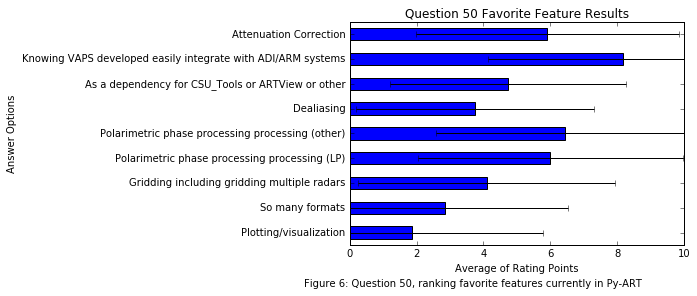

In [31]:
q50['Q50 Rating Average'].plot.barh(xerr=q50['std'],stacked=True, 
                               title='Question 50 Favorite Feature Results', xlim =(0,10))
plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 6: Question 50, ranking favorite features currently in Py-ART",
            fontsize=10)
plt.show()

## Barriers to Using Py-ART

In [32]:
q16 = panda_question_read(16, 3)
q16.drop('Unnamed: 10', axis=1, inplace=True)
q16

,"Yes, This stops me using Py-ART",This is a deterrent from using Py-ART,Neutral,Not a barrier,Really not a barrier,N/A,Q16 Rating Average,Q16 Response Count,std
Answer Options,,,,,,,,,
Radars are just not my thing and Py-ART is all about radars,0,0,0,1,0,0,2.0,1,0.755929
I have my own software I am very happy using,0,0,0,0,1,0,1.0,1,0.517549
I am not a Python User,0,0,0,0,1,0,1.0,1,0.517549
Most of my analysis is done by others in our group,0,1,0,0,0,0,4.0,1,1.388730
Difficulty to install,0,0,0,0,1,0,1.0,1,0.517549
"Honestly, I had never heard of it until I saw this survey",0,0,0,0,0,1,NaN,1,0.487950


In [33]:
q23 = panda_question_read(23, 3)
q23

,"Yep, This stops me using Py-ART",This is a deterrent from using Py-ART,Neutral,Not a barrier,Really not a barrier,N/A,Q23 Rating Average,Q23 Response Count,std
Answer Options,,,,,,,,,
Radars are just not my thing and Py-ART is all about radars,0,0,2,0,1,0,2.333333,3,1.240040
I have my own software I am very happy using,0,1,1,1,0,0,2.000000,3,1.069045
I am not a Python User,0,0,1,1,1,0,1.000000,3,0.991031
Most of my analysis is done by others in our group,0,0,2,0,1,0,0.333333,3,1.140001
Difficulty to install,1,0,1,0,0,1,2.500000,3,1.147591
"Honestly, I had never heard of it until I saw this survey",0,0,1,0,1,1,0.500000,3,0.997765


In [34]:
bar_use_concat = pd.concat((q16['Q16 Rating Average'], q23['Q23 Rating Average']))
bar_use_concat = pd.DataFrame(bar_use_concat)
bar_use_by_row_index = bar_use_concat.groupby(bar_use_concat.index)

bar_use_df_std = bar_use_by_row_index.std()
bar_use_df_var = bar_use_by_row_index.var()
bar_use_df_mean = bar_use_by_row_index.mean()

#q16['std'] = q23['std'] = (bar_use_df_std)
#q16['var'] = q23['var'] = (bar_use_df_var)

In [35]:
bar_use_concat_axis = pd.concat((q16['Q16 Rating Average'], q23['Q23 Rating Average']), axis=1)
bar_use_concat_axis = pd.DataFrame(bar_use_concat_axis)

bar_use_concat_axis['std'] = (bar_use_df_std)
bar_use_concat_axis['var'] = (bar_use_df_var)
bar_use_concat_axis['mean'] = (bar_use_df_mean)

bar_use_concat_axis

,Q16 Rating Average,Q23 Rating Average,std,var,mean
Answer Options,,,,,
Radars are just not my thing and Py-ART is all about radars,2.0,2.333333,0.235702,0.055556,2.166667
I have my own software I am very happy using,1.0,2.000000,0.707107,0.500000,1.500000
I am not a Python User,1.0,1.000000,0.000000,0.000000,1.000000
Most of my analysis is done by others in our group,4.0,0.333333,2.592725,6.722222,2.166667
Difficulty to install,1.0,2.500000,1.060660,1.125000,1.750000
"Honestly, I had never heard of it until I saw this survey",NaN,0.500000,NaN,NaN,0.500000


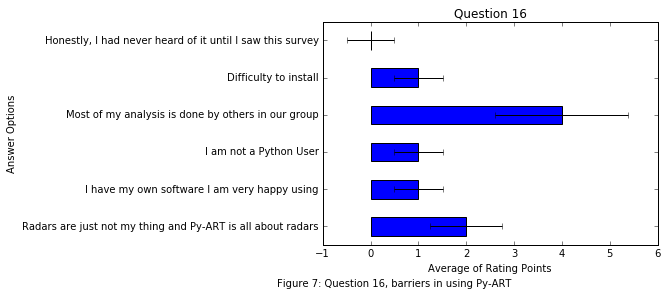

In [36]:
q16['Q16 Rating Average'].plot.barh(xerr=q16['std'], stacked=True, title='Question 16')

plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 7: Question 16, barriers in using Py-ART", fontsize=10)
plt.show()

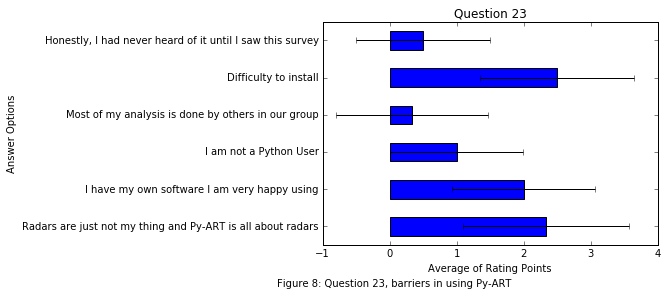

In [37]:
q23['Q23 Rating Average'].plot.barh(xerr=q23['std'], stacked=True, title='Question 23')

plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 8: Question 23, barriers in using Py-ART", fontsize=10)
plt.show()

## Barriers to Contributing to Py-ART

In [38]:
q44 = panda_question_read(44, 3)
q44

,Big barrier,Somewhat of a barrier,Neutral,Not really a barrier,Not a barrier at all,N/A,Q44 Rating Average,Q44 Response Count,std
Answer Options,,,,,,,,,
I do not understand Git or GitHub,1,1,0,0,0,1,4.5,3,1.624313
I do not think I have done anything worth contributing,1,0,0,0,1,1,3.0,3,1.246423
Institutional policies (ie IP issues),0,0,0,0,2,1,1.0,3,1.125992
I feel I need to clean the code and add unit tests,1,0,1,0,0,1,2.5,3,1.147591
Just not enough time,1,1,0,0,0,1,4.5,3,1.624313


In [39]:
q54 = panda_question_read(54, 2)
q54

,Big barrier,Somewhat of a barrier,Neutral,Not really a barrier,Not a barrier at all,N/A,Q54 Rating Average,Q54 Response Count
Answer Options,,,,,,,,
I do not understand Git or GitHub,1,5,0,3,5,1,3.428571,15
I do not think I have done anything worth contributing,6,2,3,1,2,1,1.714286,15
Institutional policies (ie IP issues),0,0,2,2,7,4,3.909091,15
I feel I need to clean the code and add unit tests,2,2,3,2,3,3,2.416667,15
Just not enough time,5,7,1,0,0,1,1.461538,14
,answered question,answered question,answered question,answered question,answered question,answered question,15.000000,15


In [40]:
bar_contr_concat = pd.concat((q44['Q44 Rating Average'], q54['Q54 Rating Average']))
bar_contr_concat = pd.DataFrame(bar_contr_concat)
bar_contr_by_row_index = bar_contr_concat.groupby(bar_contr_concat.index)

bar_contr_df_std = bar_contr_by_row_index.std()
bar_contr_df_var = bar_contr_by_row_index.var()
bar_contr_df_mean = bar_contr_by_row_index.mean()

#q44['std'] = q54['std'] = (bar_contr_df_std)
#q44['var'] = q54['var'] = (bar_contr_df_var)

In [41]:
bar_contr_concat_axis = pd.concat((q44['Q44 Rating Average'], q54['Q54 Rating Average']), axis=1)
bar_contr_concat_axis = pd.DataFrame(bar_contr_concat_axis)

bar_contr_concat_axis['std'] = (bar_contr_df_std)
bar_contr_concat_axis['var'] = (bar_contr_df_var)
bar_contr_concat_axis['mean'] = (bar_contr_df_mean)

bar_contr_concat_axis

,Q44 Rating Average,Q54 Rating Average,std,var,mean
Answer Options,,,,,
I do not understand Git or GitHub,4.5,3.428571,0.757614,0.573980,3.964286
I do not think I have done anything worth contributing,3.0,1.714286,0.909137,0.826531,2.357143
Institutional policies (ie IP issues),1.0,3.909091,2.057038,4.231405,2.454545
I feel I need to clean the code and add unit tests,2.5,2.416667,0.058926,0.003472,2.458333
Just not enough time,4.5,1.461538,2.148517,4.616124,2.980769


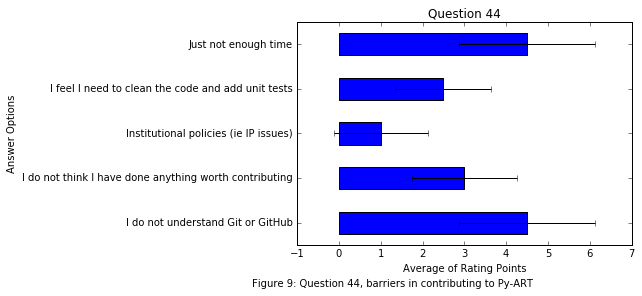

In [42]:
q44['Q44 Rating Average'].plot.barh(xerr=q44['std'], stacked=True, title='Question 44')

plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 9: Question 44, barriers in contributing to Py-ART", fontsize=10)
plt.show()

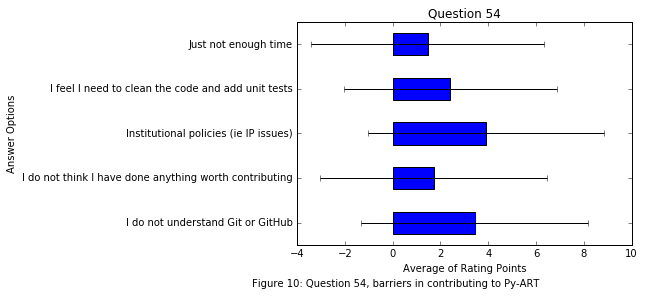

In [43]:
q54['Q54 Rating Average'].plot.barh(xerr=q54['std'], stacked=True, title='Question 54')

plt.xlabel("Average of Rating Points", fontsize=10)
plt.figtext(.02, -.02, "Figure 10: Question 54, barriers in contributing to Py-ART", fontsize=10)
plt.show()

## Organization User Belongs to

In [45]:
q11 = panda_question_read(11, 2)
q11.drop('Unnamed: 4', axis=1, inplace=True)
q11

,Q11 Response Percent,Q11 Response Count,std
Answer Options,,,
University,1,1,0.0
"Government contractor, USA (eg National Lab, NCAR)",0,0,0.0
"Government contractor, Non-USA",0,0,0.0
US Government Employee,0,0,0.0
Employ of a Government but not the US,0,0,0.0
Private Industry,0,0,0.0
Self employed or unemployed,0,0,0.0
none of the above,0,0,0.0


In [46]:
q18 = panda_question_read(18, 2)
q18

,Q18 Response Percent,Q18 Response Count,std
Answer Options,,,
University,0.333,1,0.47164
"Government contractor, USA (eg National Lab, NCAR)",0.333,1,0.47164
"Government contractor, Non-USA",0.000,0,0.00000
US Government Employee,0.000,0,0.00000
Employ of a Government but not the US,0.333,1,0.47164
Private Industry,0.000,0,0.00000
Self employed or unemployed,0.000,0,0.00000
none of the above,0.000,0,0.00000


In [49]:
q36 = panda_question_read(36, 2)
q36

,Q36 Response Percent,Q36 Response Count,std
Answer Options,,,
University,0.667,2,0.942573
"Government contractor, USA (eg National Lab, NCAR)",0.000,0,0.000000
"Government contractor, Non-USA",0.000,0,0.000000
US Government Employee,0.000,0,0.000000
Employ of a Government but not the US,0.000,0,0.000000
Private Industry,0.333,1,0.471640
Self employed or unemployed,0.000,0,0.000000
none of the above,0.000,0,0.000000


In [50]:
q46 = panda_question_read(46, 2)
q46

,Q46 Response Percent,Q46 Response Count,std
Answer Options,,,
University,0.667,10,6.599428
"Government contractor, USA (eg National Lab, NCAR)",0.000,0,0.000000
"Government contractor, Non-USA",0.133,2,1.320168
US Government Employee,0.067,1,0.659731
Employ of a Government but not the US,0.067,1,0.659731
Private Industry,0.000,0,0.000000
Self employed or unemployed,0.067,1,0.659731
none of the above,0.000,0,0.000000


In [51]:
org_belong_df_concat = pd.concat((q11['Q11 Response Percent'], q18['Q18 Response Percent'], 
                           q36['Q36 Response Percent'], q46['Q46 Response Percent']))
org_belong_df_concat = pd.DataFrame(org_belong_df_concat)

In [52]:
org_belong_by_row_index = org_belong_df_concat.groupby(org_belong_df_concat.index)
org_belong_df_std = org_belong_by_row_index.std()
org_belong_df_var = org_belong_by_row_index.var()
org_belong_df_mean = org_belong_by_row_index.mean()

#q11['std'] = q18['std'] = q36['std'] = q46['std'] = (org_belong_df_std)
#q11['var'] = q18['var'] = q36['var'] = q46['var'] = (org_belong_df_var)

In [53]:
org_belong_df_concat_axis = pd.concat((q11['Q11 Response Percent'], q18['Q18 Response Percent'], 
                                q36['Q36 Response Percent'], q46['Q46 Response Percent']), 
                                axis=1)

org_belong_df_concat_axis = pd.DataFrame(org_belong_df_concat_axis)

org_belong_df_concat_axis['std'] = (org_belong_df_std)
org_belong_df_concat_axis['var'] = (org_belong_df_var)
org_belong_df_concat_axis['mean'] = (org_belong_df_mean)

org_belong_df_concat_axis

,Q11 Response Percent,Q18 Response Percent,Q36 Response Percent,Q46 Response Percent,std,var,mean
Answer Options,,,,,,,
University,1,0.333,0.667,0.667,0.272302,0.074148,0.66675
"Government contractor, USA (eg National Lab, NCAR)",0,0.333,0.000,0.000,0.166500,0.027722,0.08325
"Government contractor, Non-USA",0,0.000,0.000,0.133,0.066500,0.004422,0.03325
US Government Employee,0,0.000,0.000,0.067,0.033500,0.001122,0.01675
Employ of a Government but not the US,0,0.333,0.000,0.067,0.158512,0.025126,0.10000
Private Industry,0,0.000,0.333,0.000,0.166500,0.027722,0.08325
Self employed or unemployed,0,0.000,0.000,0.067,0.033500,0.001122,0.01675
none of the above,0,0.000,0.000,0.000,0.000000,0.000000,0.00000


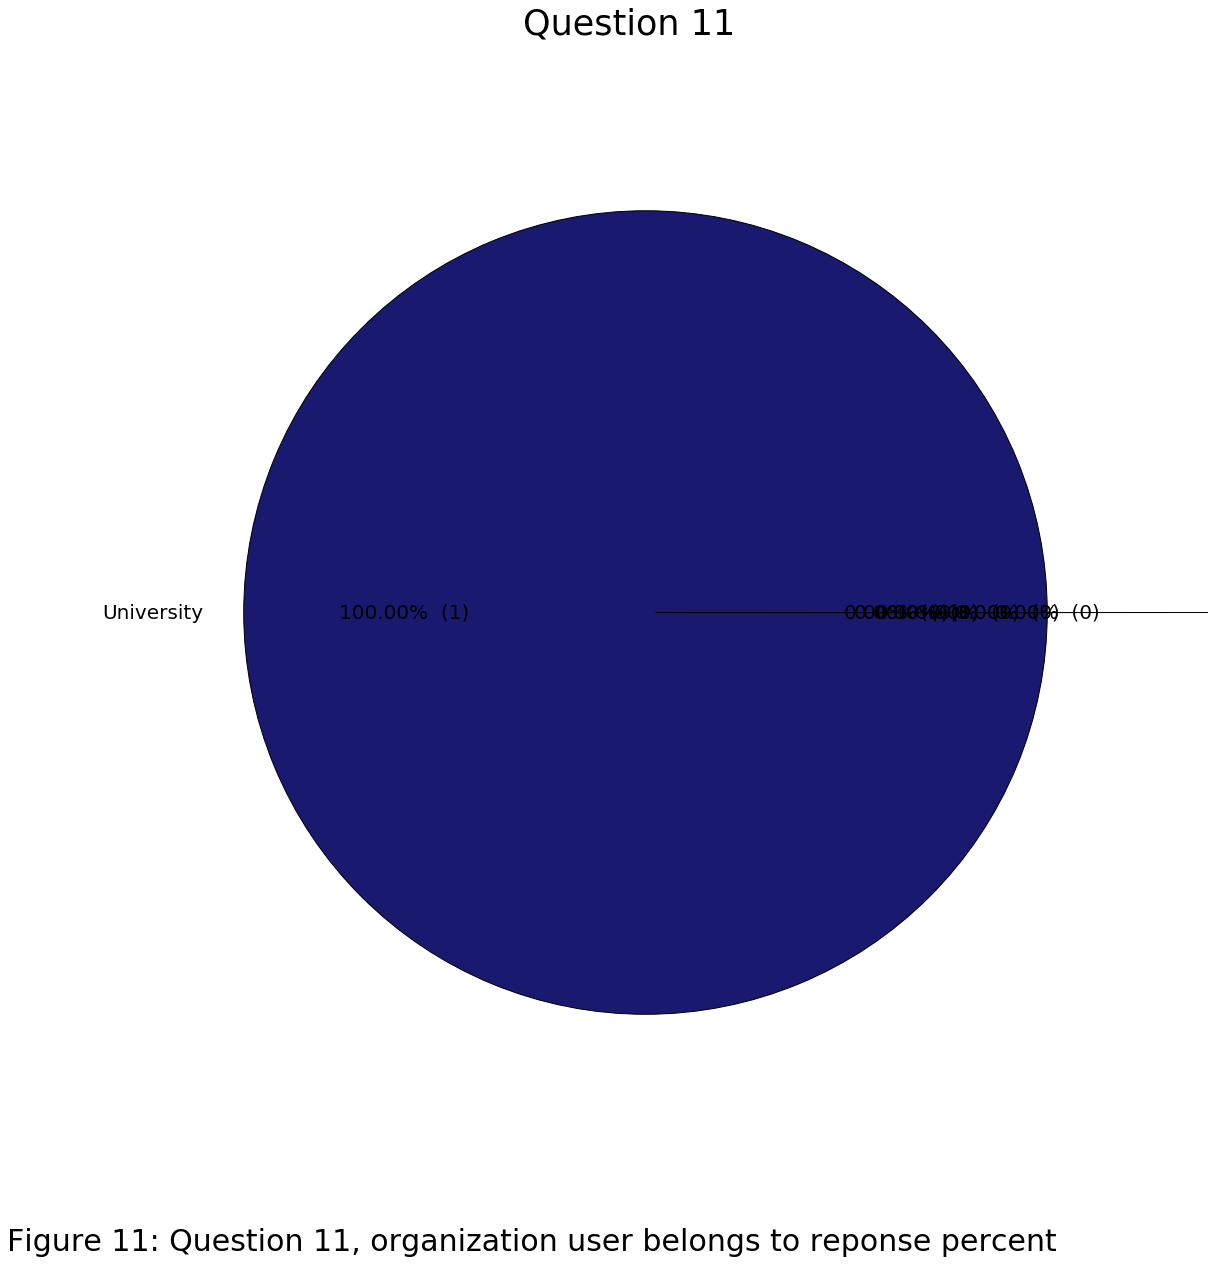

In [54]:
q11['Q11 Response Count'].plot.pie(figsize=(18, 18), 
                                     autopct=make_autopct(q11['Q11 Response Count']),
                                     colors=colors, fontsize=20, explode=explode)
plt.ylabel('')
plt.suptitle('Question 11', fontsize=35)
plt.figtext(.02, .02, "Figure 11: Question 11, organization user belongs to reponse percent",  fontsize=30)
plt.show()

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


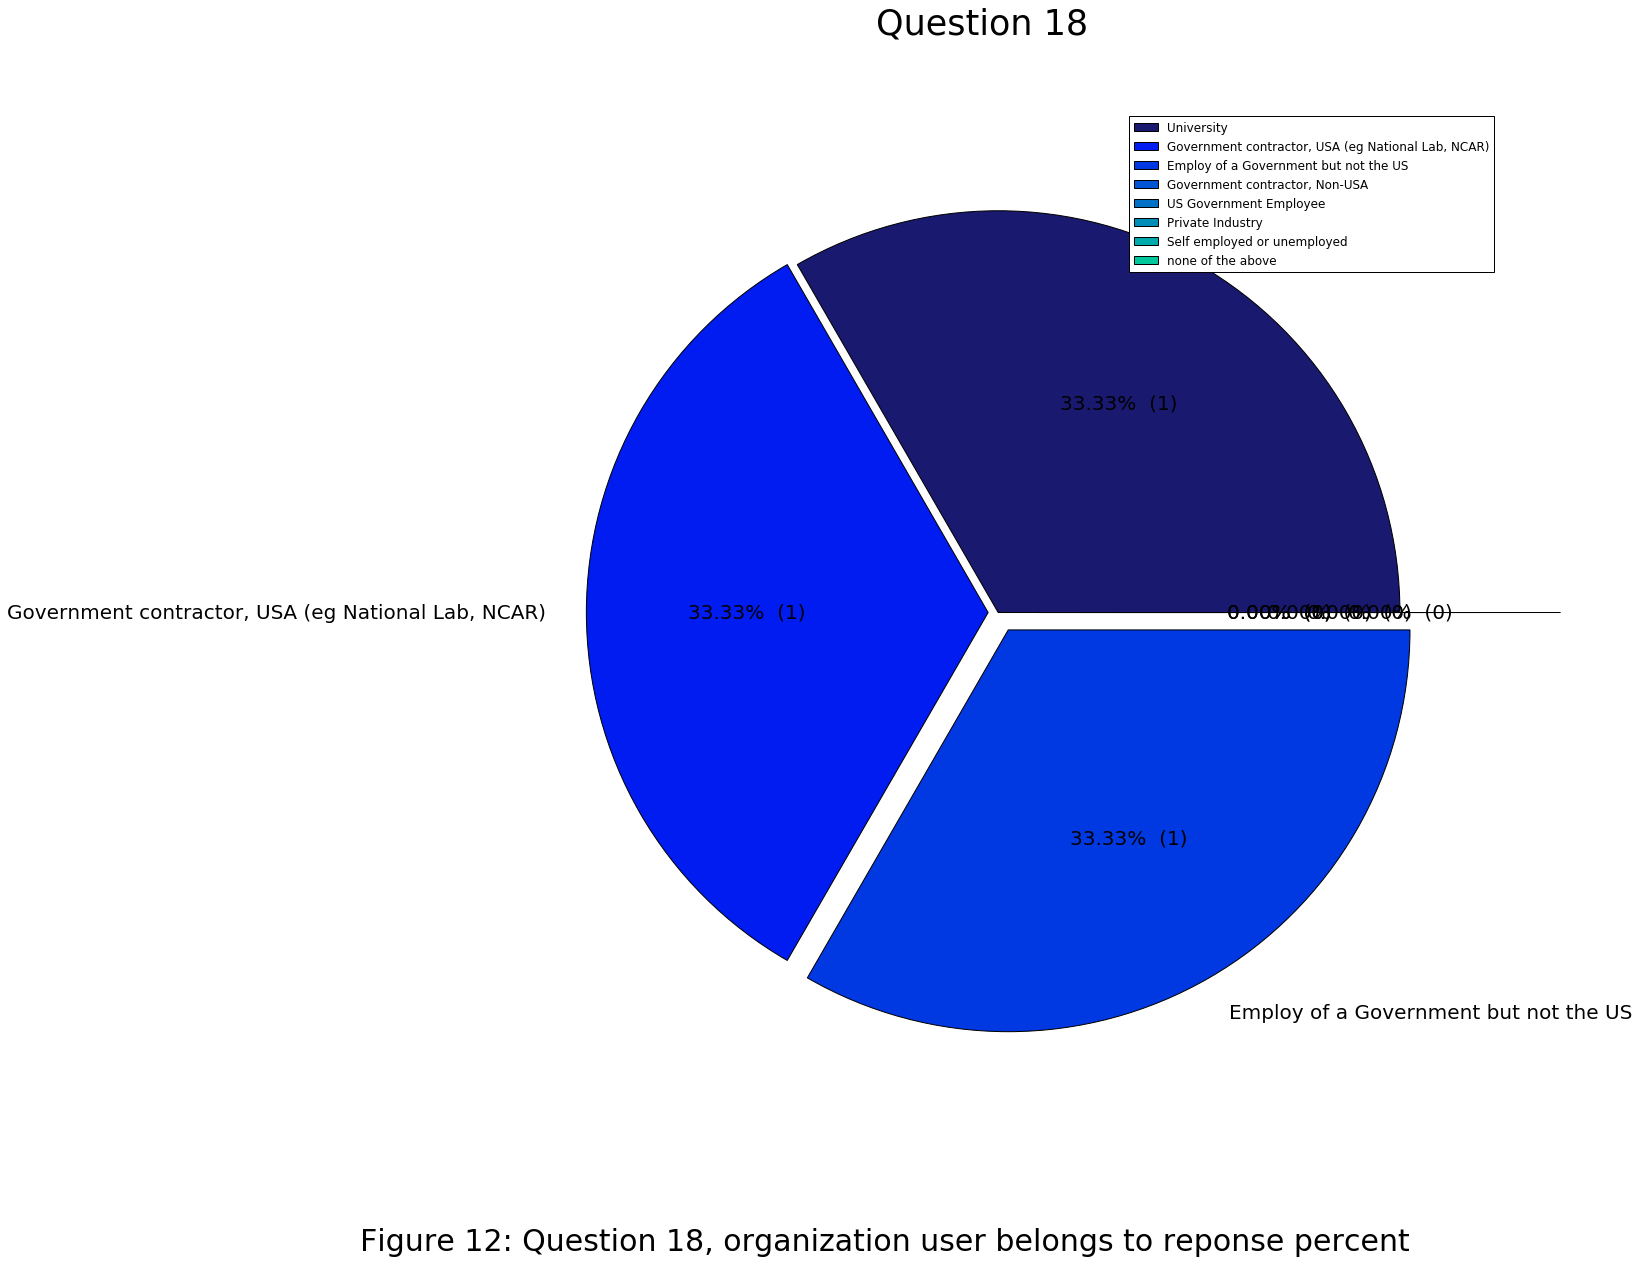

In [55]:
q18_sorted = q18.sort('Q18 Response Count', ascending=False)
q18_plot = q18_sorted['Q18 Response Count'].plot.pie(figsize=(18, 18), 
                                                     autopct=make_autopct(q18['Q18 Response Count']),
                                                     colors=colors, fontsize=20, explode=explode, 
                                                     legend=True)
plt.ylabel('')
plt.suptitle('Question 18', fontsize=35)
plt.figtext(.02, .02, "Figure 12: Question 18, organization user belongs to reponse percent",  fontsize=30)
plt.show()

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


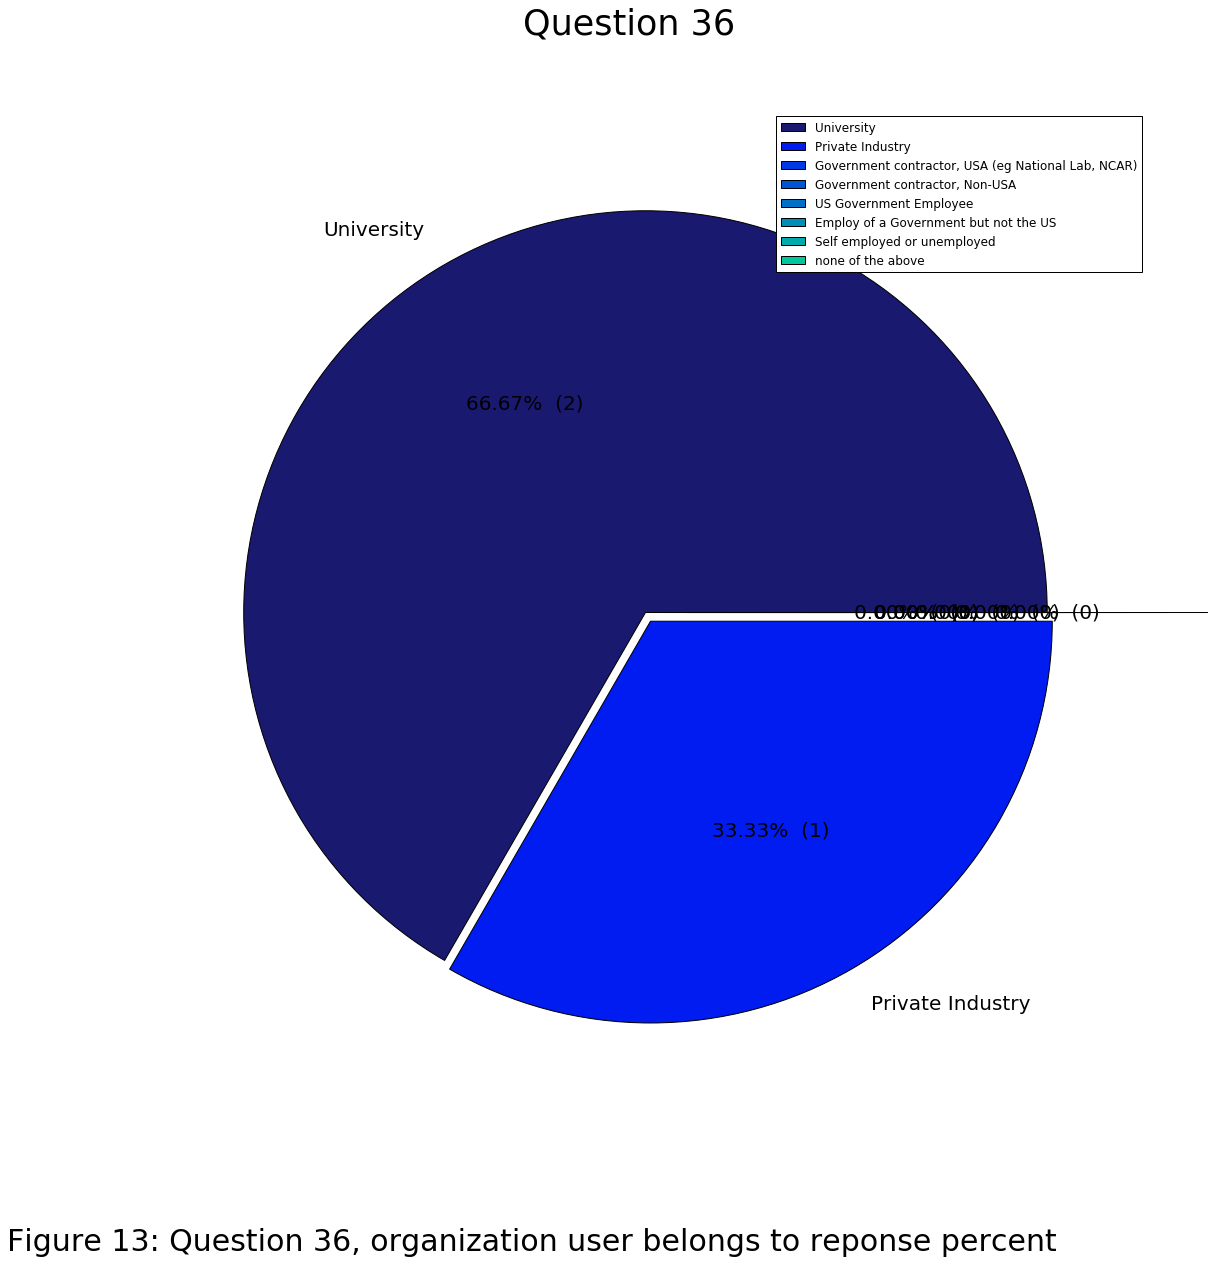

In [56]:
q36_sorted = q36.sort('Q36 Response Count', ascending=False)
q36_plot = q36_sorted['Q36 Response Count'].plot.pie(figsize=(18, 18), 
                                      autopct=make_autopct(q36['Q36 Response Count']),
                                      colors=colors, fontsize=20, explode=explode, legend=True)
plt.ylabel('')
plt.suptitle('Question 36', fontsize=35)
plt.figtext(.02, .02, "Figure 13: Question 36, organization user belongs to reponse percent",  fontsize=30)
plt.show()

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


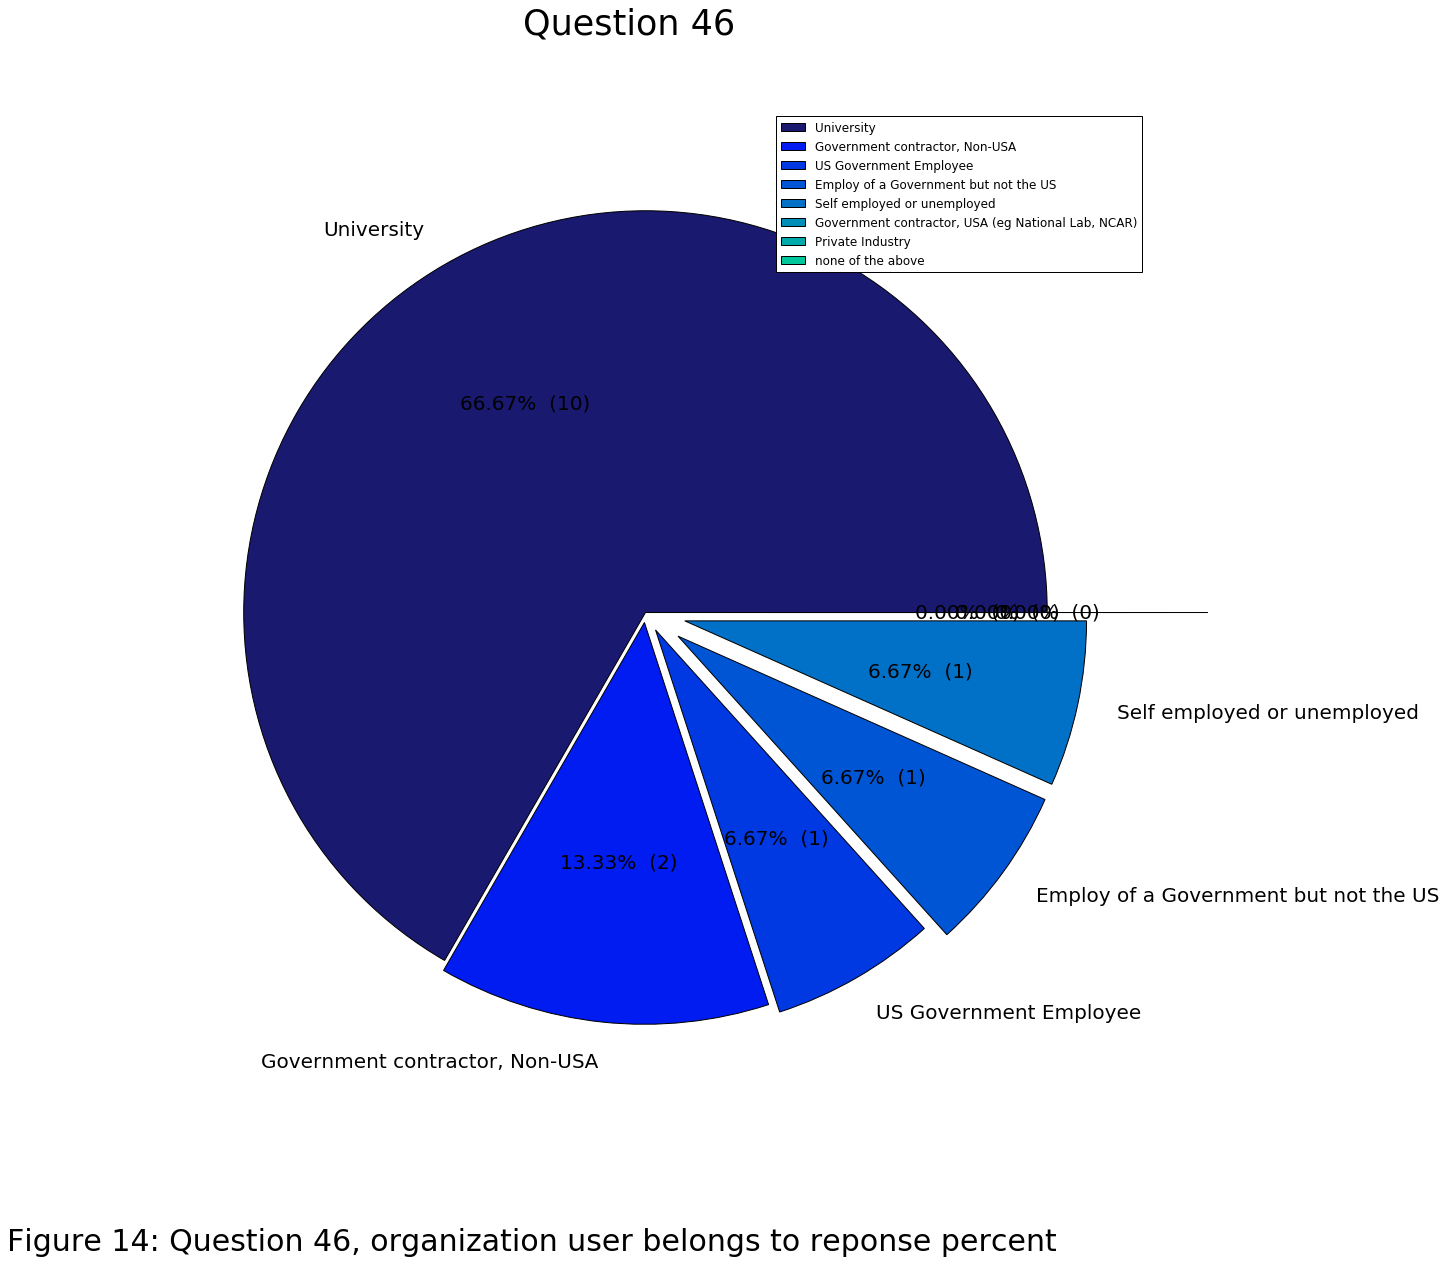

In [57]:
q46_sorted = q46.sort('Q46 Response Count', ascending=False)

q46_sorted['Q46 Response Count'].plot.pie(figsize=(18, 18), 
                                autopct=make_autopct(q46['Q46 Response Count']),
                                 colors=colors, fontsize=20, explode=explode, legend=True)

plt.ylabel('')
plt.suptitle('Question 46', fontsize=35)
plt.figtext(.02, .02, "Figure 14: Question 46, organization user belongs to reponse percent",  fontsize=30)
plt.show()

## User Organization Role

In [58]:
q10 = panda_question_read(10, 2)
q10.drop('Unnamed: 4', axis=1, inplace=True)
q10

,Q10 Response Percent,Q10 Response Count,std
Answer Options,,,
Undergraduate Student,0,0,0.0
Graduate student,0,0,0.0
Research assistant,0,0,0.0
Postdoctoral,1,1,0.0
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",0,0,0.0
Tenure track or Tenured Proffessor,0,0,0.0
Retired,0,0,0.0
None of the above,0,0,0.0


In [59]:
q17 = panda_question_read(17, 2)
q17

,Q17 Response Percent,Q17 Response Count,std
Answer Options,,,
Undergraduate Student,0.000,0,0.000000
Graduate student,0.000,0,0.000000
Research assistant,0.333,1,0.471640
Postdoctoral,0.000,0,0.000000
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",0.667,2,0.942573
Tenure track or Tenured Proffessor,0.000,0,0.000000
Retired,0.000,0,0.000000
None of the above,0.000,0,0.000000


In [60]:
q35 = panda_question_read(35, 2)
q35

,Q35 Response Percent,Q35 Response Count,std
Answer Options,,,
Undergraduate Student,0.000,0,0.000000
Graduate student,0.000,0,0.000000
Research assistant,0.000,0,0.000000
Postdoctoral,0.000,0,0.000000
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",0.333,1,0.471640
Tenure track or Tenured Proffessor,0.667,2,0.942573
Retired,0.000,0,0.000000
None of the above,0.000,0,0.000000


In [61]:
q45 = panda_question_read(45, 2)
q45

,Q45 Response Percent,Q45 Response Count,std
Answer Options,,,
Undergraduate Student,0.000,0,0.000000
Graduate student,0.400,6,3.959798
Research assistant,0.200,3,1.979899
Postdoctoral,0.000,0,0.000000
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",0.267,4,2.639630
Tenure track or Tenured Proffessor,0.067,1,0.659731
Retired,0.000,0,0.000000
None of the above,0.067,1,0.659731


## How Long the User has been using Py-ART

In [62]:
q37 = panda_question_read(37, 2)
q37

,Q37 Response Percent,Q37 Response Count,std
Answer Options,,,
less than a month,0.000,0,0.000000
Greater than a month less than 6 months,0.000,0,0.000000
greater than 6 months less than a year,0.333,1,0.471640
a year or greater,0.667,2,0.942573


In [63]:
q47 = panda_question_read(47, 2)
q47

,Q47 Response Percent,Q47 Response Count,std
Answer Options,,,
less than a month,0.133,2,1.320168
Greater than a month less than 6 months,0.000,0,0.000000
greater than 6 months less than a year,0.267,4,2.639630
a year or greater,0.600,9,5.939697


## Operating System Used

In [64]:
q38 = panda_question_read(38, 2)
q38

,Q38 Response Percent,Q38 Response Count,std
Answer Options,,,
Linux,0.667,2,0.942573
Windows,0.333,1,0.471640
Mac,0.000,0,0.000000


In [65]:
q48 = panda_question_read(48, 2)
q48

,Q48 Response Percent,Q48 Response Count,std
Answer Options,,,
Linux,0.400,6,3.959798
Windows,0.133,2,1.320168
Mac,0.467,7,4.619529


# Installation Method

In [66]:
q39 = panda_question_read(39, 2)
q39

,Q39 Response Percent,Q39 Response Count,std
Answer Options,,,
"My own Scipy stack, Installed from source",0.000,0,0.000000
"On top of Anaconda, installed from source",0.667,2,0.942573
Binary install from the jjhelmus channel,0.333,1,0.471640
Pip install,0.000,0,0.000000


In [67]:
q49 = panda_question_read(49, 2)
q49

,Q49 Response Percent,Q49 Response Count,std
Answer Options,,,
"My own Scipy stack, Installed from source",0.000,0,0.000000
"On top of Anaconda, installed from source",0.929,13,8.535486
Binary install from the jjhelmus channel,0.000,0,0.000000
Pip install,0.071,1,0.656902
